In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from datetime import date
from dateutil.parser import parse
import numpy as np
from sklearn import preprocessing
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\COBENA\Desktop\Learn\Code\FTW\Capstone Idea\Automotive\Web Scraping/080119_pk and carmudi_complete.csv')

## EDA

In [3]:
final_df=df.copy()

In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20088 entries, 0 to 20087
Data columns (total 21 columns):
ID                     20088 non-null object
Title                  20088 non-null object
Price                  20088 non-null int64
Brand                  20088 non-null object
Model                  20088 non-null object
Year of Manufacture    20088 non-null int64
Used                   20088 non-null object
Transmission           20088 non-null object
Color Family           18822 non-null object
Mileage (in km)        15562 non-null float64
Body Type              20088 non-null object
Version                5989 non-null object
Description            20026 non-null object
Poster                 19772 non-null object
Poster Type            20088 non-null object
Fuel Type              16921 non-null object
Location.2             20088 non-null object
Date Posted            20088 non-null int64
name                   20088 non-null object
retail                 20088 non-null i

In [5]:
#replaced null color values as 'No Color'. Same for fuel type.
final_df['Color Family']=final_df['Color Family'].fillna('No Color')
final_df['Fuel Type']=final_df['Fuel Type'].fillna('No Fuel Type')

In [6]:
final_df['age_of_car']=2019-final_df['Year of Manufacture']
final_df.head()

,ID,Title,Price,Brand,Model,Year of Manufacture,Used,Transmission,Color Family,Mileage (in km),...,Description,Poster,Poster Type,Fuel Type,Location.2,Date Posted,name,retail,Post Age,age_of_car
0,CAR000001,Red Chevrolet Cruze 2012 Automatic Gasoline fo...,299000,Chevrolet,Cruze,2012,Yes,Automatic,No Color,60000.0,...,Automatic Transmission Chevrolet Cruze 2012 - ...,Call_09154552229,Individual,Gasoline,Paranaque,43662,ChevroletCruze,858888,16,7
1,CAR000002,Sell Brown 2016 Chevrolet Captiva Automatic Di...,828000,Chevrolet,Captiva,2016,Yes,Automatic,Brown,NaN,...,2016 Chevrolet All New Captiva VCDi 2.0 Turbo...,Bestcardealsph,Dealer,Diesel,Manila,43663,ChevroletCaptiva,1313888,15,3
2,CAR000003,Sell Used 2018 Chevrolet Sail Automatic at 600...,450000,Chevrolet,Sail,2018,Yes,Automatic,No Color,6000.0,...,2018 CHEVROLET SAIL Automatic Transmission 6tk...,jayjet,Individual,Gasoline,Quezon City,43806,ChevroletSail,791888,20,1
3,CAR000004,Sell 2nd Hand 2016 Chevrolet Sail at 6000 km i...,450000,Chevrolet,Sail,2016,Yes,Automatic,White,6000.0,...,2018 CHEVROLET SAIL Automatic Transmission 6tk...,jayjet,Individual,Gasoline,Quezon City,43806,ChevroletSail,791888,20,3
4,CAR000005,Used 2011 Chevrolet Captiva Automatic Diesel f...,468000,Chevrolet,Captiva,2011,Yes,Automatic,No Color,87000.0,...,2011 Chevrolet Captiva 4x2 AT Diesel Showroom ...,All Cars Manila by: Michael Millicent,Dealer,Diesel,Makati,43745,ChevroletCaptiva,1313888,22,8


In [7]:
#deleted Poster, Version and Description
final_df.drop(columns=['Poster','Version','Description','Title','Used','name','Date Posted','Year of Manufacture'],inplace=True,axis=1)

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20088 entries, 0 to 20087
Data columns (total 14 columns):
ID                 20088 non-null object
Price              20088 non-null int64
Brand              20088 non-null object
Model              20088 non-null object
Transmission       20088 non-null object
Color Family       20088 non-null object
Mileage (in km)    15562 non-null float64
Body Type          20088 non-null object
Poster Type        20088 non-null object
Fuel Type          20088 non-null object
Location.2         20088 non-null object
retail             20088 non-null int64
Post Age           20088 non-null int64
age_of_car         20088 non-null int64
dtypes: float64(1), int64(4), object(9)
memory usage: 2.1+ MB


In [9]:
final_df.describe()

,Price,Mileage (in km),retail,Post Age,age_of_car
count,2.008800e+04,1.556200e+04,2.008800e+04,20088.000000,20088.000000
mean,8.141697e+05,5.356116e+04,1.323538e+06,52.494524,6.521356
std,1.456741e+06,1.139158e+05,1.245114e+06,40.327707,5.719296
min,5.000000e+03,1.000000e+00,0.000000e+00,5.000000,-1.000000
25%,3.680000e+05,1.900000e+04,7.587500e+05,27.000000,2.000000
50%,5.680000e+05,4.316950e+04,1.032000e+06,37.000000,5.000000
75%,8.880000e+05,7.500000e+04,1.607000e+06,67.000000,9.000000
max,1.234568e+08,1.234568e+07,2.355000e+07,1017.000000,57.000000


In [10]:
final_df=final_df[final_df['age_of_car']>=0]
final_df=final_df[final_df['retail']>0]
final_df.head()

,ID,Price,Brand,Model,Transmission,Color Family,Mileage (in km),Body Type,Poster Type,Fuel Type,Location.2,retail,Post Age,age_of_car
0,CAR000001,299000,Chevrolet,Cruze,Automatic,No Color,60000.0,Saloon / Sedan,Individual,Gasoline,Paranaque,858888,16,7
1,CAR000002,828000,Chevrolet,Captiva,Automatic,Brown,NaN,SUV,Dealer,Diesel,Manila,1313888,15,3
2,CAR000003,450000,Chevrolet,Sail,Automatic,No Color,6000.0,Saloon / Sedan,Individual,Gasoline,Quezon City,791888,20,1
3,CAR000004,450000,Chevrolet,Sail,Automatic,White,6000.0,Saloon / Sedan,Individual,Gasoline,Quezon City,791888,20,3
4,CAR000005,468000,Chevrolet,Captiva,Automatic,No Color,87000.0,SUV,Dealer,Diesel,Makati,1313888,22,8


## Check the Data Some More

In [11]:
x=final_df['Mileage (in km)']
y=final_df['age_of_car']

In [12]:
#isolate x and y values that have mileage values in. In other words, we removed blank mileage records.
x_val=final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].notnull()]
y_val=final_df['age_of_car'].loc[~final_df['Mileage (in km)'].isnull()]

(0, 1000000)

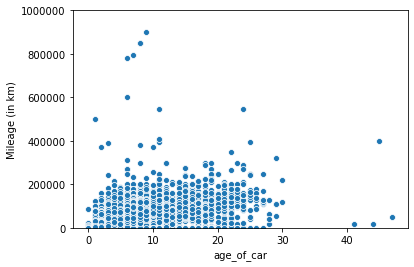

In [13]:
sns.scatterplot(y,x,data=final_df)
plt.ylim(0,1000000)

In [14]:
"""
Age and mileage should be directly correlated
Check normal distribution curve per brand
"""

'\nAge and mileage should be directly correlated\nCheck normal distribution curve per brand\n'

In [15]:
x_val_trim=x_val[x_val<700000]
y_val_trim=y_val[x_val<700000]

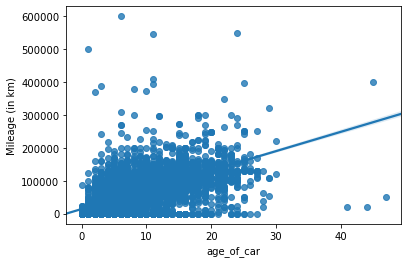

In [16]:
sns.regplot(y_val_trim,x_val_trim,data=final_df)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_val_trim,x_val_trim)

In [17]:
print(slope)
print(p_value)

5863.167483208007
0.0


## Impute Mileage Using KNN

In [18]:
#gets the age of car with no null values in the mileage
X=pd.DataFrame(final_df['age_of_car'].loc[final_df['Mileage (in km)'].notnull()])
#gets the age of car with null values in the mileage
X_null=pd.DataFrame(final_df['age_of_car'].loc[final_df['Mileage (in km)'].isnull()])
#gets the mileage with no null values in the mileage
y=pd.DataFrame(final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].notnull()])
#gets the mileage with null values in the mileage
y_null=pd.DataFrame(final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].isnull()])

In [19]:
#might have to double check the neighbors
clf=KNeighborsRegressor(3,weights='distance')
trained_model=clf.fit(X,y)

In [20]:
#predicting imputed values and setting the index to match the X_null dataframe
imputed_val=pd.DataFrame(trained_model.predict(X_null),columns=['Mileage (in km)'])
X_null.reset_index(inplace=True)

In [21]:
#merge imputed values with your Yr of Manufacture pair
null_merged=pd.merge(X_null,imputed_val,how='outer',on=X_null.index)
#deleted useless key column that came from  the mileage dataframe
null_merged.drop('key_0',inplace=True,axis=1)
#index of Yr of Manufacture is set as the index
null_merged.set_index('index',inplace=True)

In [22]:
# merged them all together (Yr of Manufacture and Mileage) non null records
xy_merged=pd.concat([X,y],axis=1)
# merged the non nulls with the imputed or previous nulls
merged_df=pd.concat([null_merged,xy_merged],axis=0)
# rearranged indedx so it's prettier
merged_df=merged_df.sort_index()
merged_df.head()

,age_of_car,Mileage (in km)
0,7,60000.000000
1,3,12718.333333
2,1,6000.000000
3,3,6000.000000
4,8,87000.000000


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18288 entries, 0 to 20087
Data columns (total 2 columns):
age_of_car         18288 non-null int64
Mileage (in km)    18288 non-null float64
dtypes: float64(1), int64(1)
memory usage: 428.6 KB


In [24]:
# merge it with the whole df but original null mileage and age is still there
total_merge=pd.merge(final_df,merged_df,on=final_df.index)
# dropped the original null mileage and age. The new boys are in town!
total_merge.drop(['age_of_car_x','Mileage (in km)_x','key_0'],axis=1,inplace=True)
#renamed them
total_merge.columns=['id','price','brand','model','transmission','color','body_type','poster_type','fuel_type','location','retail','post_age_in_days','age_of_car','mileage_in_km']
total_merge.head()

,id,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
0,CAR000001,299000,Chevrolet,Cruze,Automatic,No Color,Saloon / Sedan,Individual,Gasoline,Paranaque,858888,16,7,60000.000000
1,CAR000002,828000,Chevrolet,Captiva,Automatic,Brown,SUV,Dealer,Diesel,Manila,1313888,15,3,12718.333333
2,CAR000003,450000,Chevrolet,Sail,Automatic,No Color,Saloon / Sedan,Individual,Gasoline,Quezon City,791888,20,1,6000.000000
3,CAR000004,450000,Chevrolet,Sail,Automatic,White,Saloon / Sedan,Individual,Gasoline,Quezon City,791888,20,3,6000.000000
4,CAR000005,468000,Chevrolet,Captiva,Automatic,No Color,SUV,Dealer,Diesel,Makati,1313888,22,8,87000.000000


## Time to change categorical values to numerical...

In [25]:
total_merge.info()
#object means it's a categorical value or text

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18288 entries, 0 to 18287
Data columns (total 14 columns):
id                  18288 non-null object
price               18288 non-null int64
brand               18288 non-null object
model               18288 non-null object
transmission        18288 non-null object
color               18288 non-null object
body_type           18288 non-null object
poster_type         18288 non-null object
fuel_type           18288 non-null object
location            18288 non-null object
retail              18288 non-null int64
post_age_in_days    18288 non-null int64
age_of_car          18288 non-null int64
mileage_in_km       18288 non-null float64
dtypes: float64(1), int64(4), object(9)
memory usage: 2.1+ MB


In [26]:
#used label encoder to change cat to num
le = preprocessing.LabelEncoder()

In [27]:
# tm_col = ['brand','model','transmission','color','body_type','poster_type','fuel_type','location']
# le_classes = {}
# for col in tm_col:
#     total_merge[col]=le.fit_transform(total_merge[col])
#     le_classes.update({col: le.classes_})

In [28]:
# set it in the column itself to transform the dataframe into numbers and also making a dictionary so you can "unlock" the encoder with categorical values=
tm_col = ['brand','model','transmission','color','body_type','poster_type','fuel_type','location']
le_classes = {}
for col in tm_col:
    total_merge[col]=le.fit_transform(total_merge[col])
    le_classes.update({col: {le.classes_[n]:n for n in range(len(le.classes_))}})

In [29]:
#made the dataframe prettier by moving the id as index and deleting that pesky id title
total_merge.set_index('id',inplace=True)
total_merge.rename_axis(index=None,inplace=True)
total_merge.head()

,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
CAR000001,299000,7,130,1,10,6,1,2,277,858888,16,7,60000.000000
CAR000002,828000,7,107,1,4,5,0,0,231,1313888,15,3,12718.333333
CAR000003,450000,7,320,1,10,6,1,2,299,791888,20,1,6000.000000
CAR000004,450000,7,320,1,21,6,1,2,299,791888,20,3,6000.000000
CAR000005,468000,7,107,1,10,5,0,0,218,1313888,22,8,87000.000000


In [30]:
# I just reassigned just cause lol
final_df=total_merge.copy()

In [31]:
final_df.to_csv("capstone_dataset.csv")

## Maybe we can try imputing Mileage using median... Next time na lang haha

In [32]:
#final_df['mileage_in_km'].fillna(final_df.groupby('year_of_manufacture')['mileage_in_km'].transform('median'),inplace=True)

In [33]:
#final_df['mileage_in_km'].fillna(final_df['mileage_in_km'].median(),inplace=True)

In [34]:
#final_df[['mileage_in_km']].head()

## Model

## It's time for Decision Trees?! So we know how they split </3

In [35]:
# Assigned features except for price to X and assigned price to y
X=final_df.drop(['price'],axis=1)
y=final_df['price']

In [36]:
X.head()

,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
CAR000001,7,130,1,10,6,1,2,277,858888,16,7,60000.000000
CAR000002,7,107,1,4,5,0,0,231,1313888,15,3,12718.333333
CAR000003,7,320,1,10,6,1,2,299,791888,20,1,6000.000000
CAR000004,7,320,1,21,6,1,2,299,791888,20,3,6000.000000
CAR000005,7,107,1,10,5,0,0,218,1313888,22,8,87000.000000


In [37]:
# why did I use these parameters? I just guessed them 'cause any way I care more about random forest. Bahala si dec tree
dec_tree=tree.DecisionTreeRegressor(min_samples_split=3, min_samples_leaf=5,max_depth=10,random_state=4)

In [38]:
# checked to see reliability of our random dec tree. Not that reliable apparently lol.
print(np.mean(cross_val_score(dec_tree,X,y,cv=5)))

0.5473855563794668


In [39]:
# data performed better because price is so large compared to the other X variables
y_log=np.log(y)

In [40]:
# set the train test split while using y_log as part of it.
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.25,random_state=4)
X_train.shape,X_test.shape,y_log_train.shape,y_log_test.shape

((13716, 12), (4572, 12), (13716,), (4572,))

In [41]:
# fit decision tree train set
dec_tree.fit(X_train,y_log_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=4, splitter='best')

In [42]:
# I used the fitted decision tre to predict the log of the price
y_pred=dec_tree.predict(X_test)

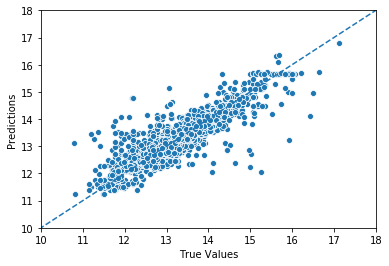

In [43]:
# plotted it to see how it compares with the actual values. This is for the decision tree model
sns.scatterplot(y_log_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim(10,18)
plt.ylim(10,18)
vals = np.linspace(start = 0, stop = 18, num = 10)
plt.plot(vals,vals,linestyle='--')

In [44]:
final_df.head()

,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
CAR000001,299000,7,130,1,10,6,1,2,277,858888,16,7,60000.000000
CAR000002,828000,7,107,1,4,5,0,0,231,1313888,15,3,12718.333333
CAR000003,450000,7,320,1,10,6,1,2,299,791888,20,1,6000.000000
CAR000004,450000,7,320,1,21,6,1,2,299,791888,20,3,6000.000000
CAR000005,468000,7,107,1,10,5,0,0,218,1313888,22,8,87000.000000


In [45]:
Xnew=[[23,132,1,2,3,1,2,121,900000,40,4,4500]]

In [46]:
ynew_pred=dec_tree.predict(Xnew)

In [47]:
np.exp(ynew_pred)

array([504724.54199905])

In [48]:
#time to do feature importance. set indep and dep vars appropriately
feature='price'
indepvar=final_df.drop('price',axis=1).columns
indepvar

Index(['brand', 'model', 'transmission', 'color', 'body_type', 'poster_type',
       'fuel_type', 'location', 'retail', 'post_age_in_days', 'age_of_car',
       'mileage_in_km'],
      dtype='object')

In [49]:
# #print out the nodes. Shows you how dec tree splits
# import graphviz
# dot_data = tree.export_graphviz(dec_tree,out_file=None,feature_names=indepvar.tolist(),class_names='price')
# graph = graphviz.Source(dot_data)
# graph

In [50]:
# time for feature importance. Line below shows 0 is 50% important, 1 is 20% important but what is 0 and 1?
f_importance = dec_tree.feature_importances_
# f_list assigns the names of the indep variables so now we can say 0 is age so and so forth
f_list=X_train.columns
# this places it in a dataframe lang pinagsam yung nasa taas.
df_feature_importance=pd.DataFrame(f_importance,columns=['importance'],index=f_list).sort_values(['importance'],ascending=False)

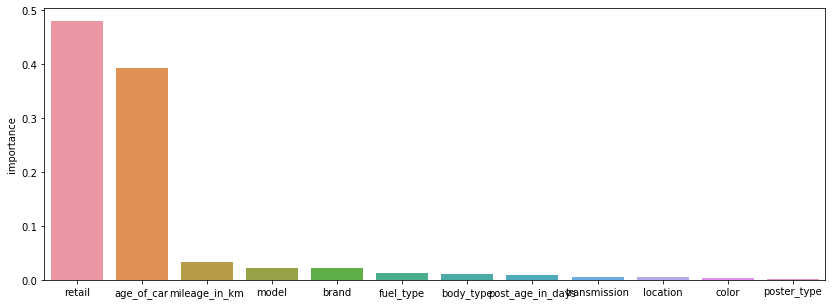

In [51]:
#plot the feature importance
fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(df_feature_importance.index,df_feature_importance['importance'],data=df_feature_importance)
# plt.rcParams.update({'font.size': 10})

## Now that we have an idea on how the tree splits, let's try Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf = RandomForestRegressor(n_estimators=400,max_features=0.9157035175944501,min_samples_leaf=1,min_samples_split=5,oob_score=True,random_state=4)

In [54]:
# fit the train set to the random forest model
rf.fit(X_train, y_log_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.9157035175944501, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=True, random_state=4, verbose=0,
                      warm_start=False)

In [55]:
# predicted values based on the fitted random forest
y_pred=rf.predict(X_test)
np.exp(y_pred)

array([346291.32161288, 275533.75094751, 547437.53267217, ...,
       566806.73024324, 842433.86284698, 585161.8703855 ])

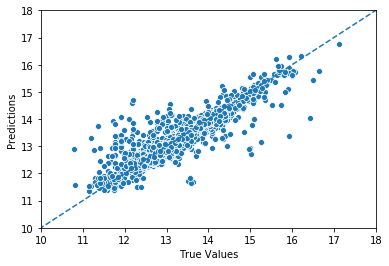

In [56]:
# This is plotting actual vs predicted based on random forest.
sns.scatterplot(y_log_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim(10,18)
plt.ylim(10,18)
vals = np.linspace(start = 0, stop = 18, num = 10)
plt.plot(vals,vals,linestyle='--')

In [57]:
rf.oob_score_

0.8409141582382544

In [58]:
f_list=X.columns
df_fi = pd.DataFrame(rf.feature_importances_,index=f_list,columns=['importance']).sort_values(['importance'],ascending=False)
df_fi

,importance
retail,0.426595
age_of_car,0.340072
mileage_in_km,0.067771
model,0.030622
location,0.027485
post_age_in_days,0.025822
body_type,0.023596
brand,0.021056
fuel_type,0.014764
color,0.011549


In [59]:
# checked cross val score
np.mean(cross_val_score(rf,X,y_log,cv=5))

0.8013981861690753

Text(0.5, 1.0, 'price vs age')

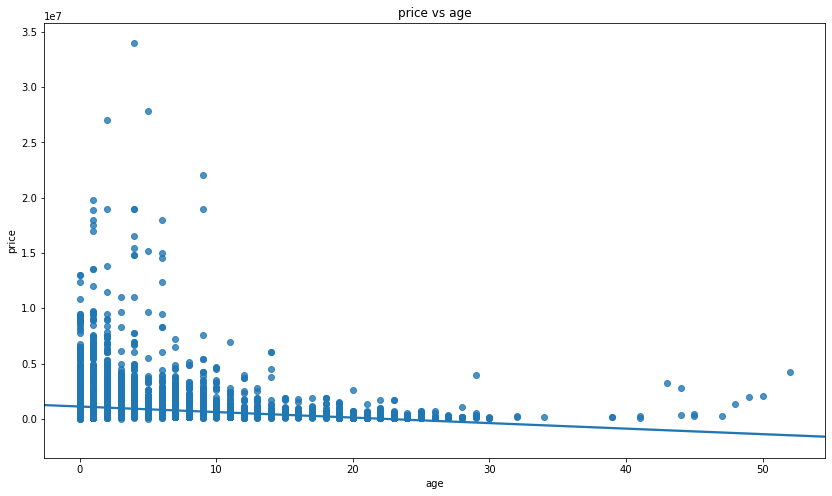

In [60]:
'''checked to see the lifetime value of the car. It seems like after 30 is crazy, and we'll be assuming it's a reworked car'''
plt.figure(figsize=(14,8))
sns.regplot(final_df['age_of_car'],np.exp(y_log))
plt.ylabel('price')
plt.xlabel('age')
plt.title('price vs age')

In [61]:
#this is the straight-line depreciation formula
dep_pred=X_test['retail']-(X_test['retail']/30*X_test['age_of_car'])

In [62]:
# checked straight-line depreciation
dep_df=final_df[['price','age_of_car']].copy()
dep_df=dep_df[dep_df['age_of_car']<=30]
dep_df['price']=np.log(dep_df['price'])

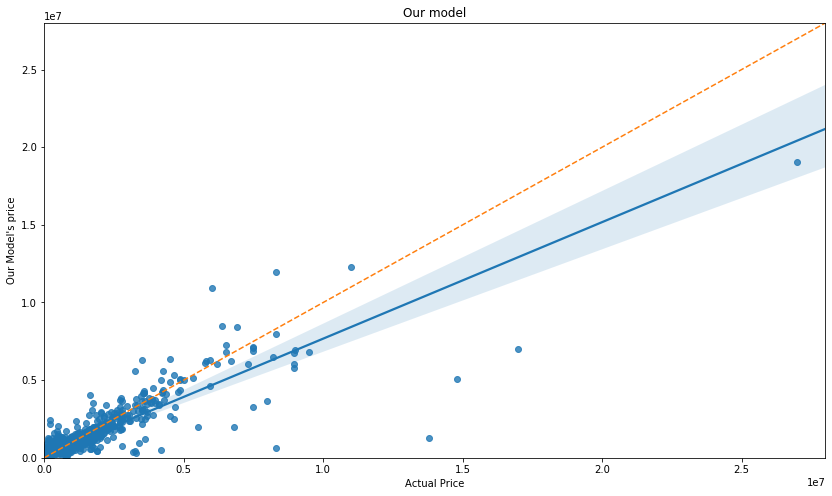

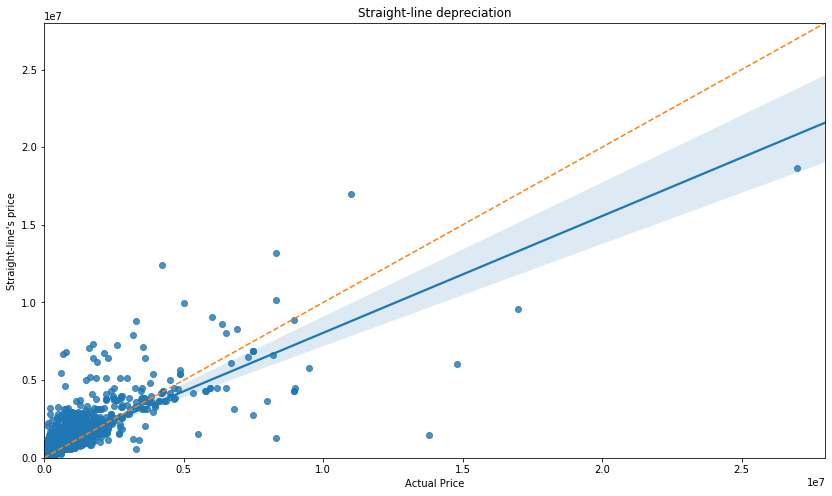

In [63]:
plt.figure(figsize=(14,8))
sns.regplot(np.exp(y_log_test),np.exp(y_pred))
plt.xlabel('Actual Price')
plt.ylabel('Our Model\'s price')
plt.title('Our model')
plt.xlim((0,2.8e7))
plt.ylim((0,2.8e7))
vals = np.linspace(start = 0, stop = 28000000, num = 100)
plt.plot(vals,vals,linestyle='--')


plt.figure(figsize=(14,8))
sns.regplot(np.exp(y_log_test),dep_pred)
plt.xlabel('Actual Price')
plt.ylabel('Straight-line\'s price')
plt.title('Straight-line depreciation')
plt.xlim((0,2.8e7))
plt.ylim((0,2.8e7))
plt.plot(vals,vals,linestyle='--')

## Cost it out

In [64]:
pred=rf.predict(inputs)
np.exp(pred)

NameError: name 'inputs' is not defined

## Time for XGBoost y'all!

In [69]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

In [72]:
xg_reg=xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha = 10, n_estimators=10)

In [73]:
xg_reg.fit(X_train,y_log_train)
xg_pred=xg_reg.predict(X_test)

In [74]:
rmse=np.sqrt(mean_squared_error(y_log_test,xg_pred))
print('RMSE: %f' % (rmse))

RMSE: 4.493326


In [75]:
np.mean(cross_val_score(xg_reg,X,y_log,cv=5))

-41.765494843079395